# 3. Reading a file using CF module

The main difference with the previous example is the way we will read the data from the file.

Instead of the netCDF4 module, we will use the [cf-python](http://cfpython.bitbucket.org/) package, which implements the [CF data model](http://cfconventions.org/) for the reading, writing and processing of data and metadata. 

In [3]:
%matplotlib inline
import cf
import netCDF4
import matplotlib.pyplot as plt

The data file is the same.

In [6]:
dataurl = "http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_canaldeibiza-scb_sbe37006/L1/dep0003_buoy-canaldeibiza_scb-sbe37006_L1_latest.nc"

## 3.1 Read the file

We use the function *read*. Doing so, we easily obtain a nice summary of the file content.

In [11]:
f = cf.read(dataurl)
print f

long_name:station name field summary
------------------------------------
Data           : long_name:station name(ncdim%name_strlen(33)) 
Axes           : ncdim%name_strlen(33)

sea_water_electrical_conductivity field summary
-----------------------------------------------
Data           : sea_water_electrical_conductivity(time(851)) S m-1
Axes           : longitude(1) = [0.783667] degree_east
               : depth(1) = [1.0] m
               : latitude(1) = [38.82445] degree_north
               : time(851) = [2015-07-01 00:00:00, ..., 2015-08-05 10:00:00] gregorian
Ancillary vars : <CF Field: sea_water_electrical_conductivity status_flag(time(851)) >

sea_water_salinity field summary
--------------------------------
Data           : sea_water_salinity(time(851)) psu
Axes           : longitude(1) = [0.783667] degree_east
               : depth(1) = [1.0] m
               : latitude(1) = [38.82445] degree_north
               : time(851) = [2015-07-01 00:00:00, ..., 2015-08-05 10:00:0

We see that the file contains 4 variables: 
1. temperature
2. salinity
3. conductivity.
Each of them has 4 dimensions: longitude, latitude, time and depth.

## 3.2 Read variable, coordinates and units

From the previous commands we cannot know the name of the variables within the file. But that's not necessary. Temperature can be retrived using its *standard name*:

In [21]:
temperature = f.select('sea_water_temperature')
temperature

[<CF Field: sea_water_temperature(time(851)) C>]

The number of variables which have a standard name corresponding to **sea_water_temperature** is:

In [23]:
print len(temperature)

1


but in other cases (ex: different sensors measuring temperature with data in a common file), one can obtain more than one variable.

To get the temperature values, we select the first element (index = 0 in python, not 1) and convert it into an array.

In [42]:
temperature_values = temperature[0].array
temperature_units = temperature[0].units
print temperature_values[0:20]
print 'Temperature units: ' + temperature_units

[ 25.03  24.99  24.9   24.71  24.73  24.63  24.58  24.75  24.79  24.84
  24.97  25.07  25.38  25.4   25.28  25.29  25.56  25.6   25.57  25.47]
Temperature units: C


We inspect the corresponding coordinates: 

In [43]:
temperature[0].coords()

{'dim0': <CF DimensionCoordinate: time(851) gregorian>,
 'dim1': <CF DimensionCoordinate: latitude(1) degree_north>,
 'dim2': <CF DimensionCoordinate: longitude(1) degree_east>,
 'dim3': <CF DimensionCoordinate: depth(1) m>}

To extract the time variable:

In [44]:
time = temperature[0].coord('time')
time

<CF DimensionCoordinate: time(851) gregorian>

and to get the values:

In [46]:
time_values = temperature[0].coord('time').array
time_units = temperature[0].coord('time').units
print time_values[0:20]
print ' '
print 'Time units: ' + time_units

[  1.43570880e+09   1.43571240e+09   1.43571600e+09   1.43571960e+09
   1.43572320e+09   1.43572680e+09   1.43573040e+09   1.43573400e+09
   1.43573760e+09   1.43574120e+09   1.43574480e+09   1.43574840e+09
   1.43575200e+09   1.43575560e+09   1.43575920e+09   1.43576280e+09
   1.43576640e+09   1.43577000e+09   1.43577360e+09   1.43577720e+09]
 
Time units: seconds since 1970-01-01 00:00:00


# 3.3 A simple plot 

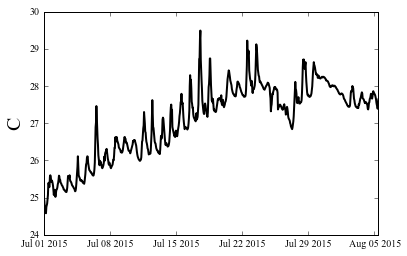

In [51]:
time2 = netCDF4.num2date(time_values, time_units)
plt.plot(time2, temperature_values)
plt.ylabel(temperature_units, fontsize=20)